In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('university_student_data.csv')
df.head()

,Year,Term,Applications,Admitted,Enrolled,Retention Rate (%),Student Satisfaction (%),Engineering Enrolled,Business Enrolled,Arts Enrolled,Science Enrolled
0,2015,Spring,2500,1500,600,85,78,200,150,125,125
1,2015,Fall,2500,1500,600,85,78,200,150,125,125
2,2016,Spring,2600,1550,625,86,79,210,160,130,125
3,2016,Fall,2600,1550,625,86,79,210,160,130,125
4,2017,Spring,2700,1600,650,87,80,225,165,135,125


In [11]:
df.columns = (
    df.columns
      .str.strip()
      .str.capitalize()
      .str.replace(' ', '_')
      .str.replace('[()%]', '', regex=True)
      .str.replace(r'[^0-9A-Za-z_]+', '', regex=True)
      .str.replace(r'_+', '_', regex=True)
      .str.replace(r'^_|_$', '', regex=True)
)

df.head()

,Year,Term,Applications,Admitted,Enrolled,Retention_rate,Student_satisfaction,Engineering_enrolled,Business_enrolled,Arts_enrolled,Science_enrolled
0,2015,Spring,2500,1500,600,85,78,200,150,125,125
1,2015,Fall,2500,1500,600,85,78,200,150,125,125
2,2016,Spring,2600,1550,625,86,79,210,160,130,125
3,2016,Fall,2600,1550,625,86,79,210,160,130,125
4,2017,Spring,2700,1600,650,87,80,225,165,135,125


In [12]:
print("Filas, columnas:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum())
display(df.describe(include='all').round(2))

Filas, columnas: (20, 11)

Tipos de datos:
Year                     int64
Term                    object
Applications             int64
Admitted                 int64
Enrolled                 int64
Retention_rate           int64
Student_satisfaction     int64
Engineering_enrolled     int64
Business_enrolled        int64
Arts_enrolled            int64
Science_enrolled         int64
dtype: object

Valores nulos por columna:
Year                    0
Term                    0
Applications            0
Admitted                0
Enrolled                0
Retention_rate          0
Student_satisfaction    0
Engineering_enrolled    0
Business_enrolled       0
Arts_enrolled           0
Science_enrolled        0
dtype: int64


,Year,Term,Applications,Admitted,Enrolled,Retention_rate,Student_satisfaction,Engineering_enrolled,Business_enrolled,Arts_enrolled,Science_enrolled
count,20.00,20,20.00,20.00,20.0,20.00,20.00,20.00,20.00,20.00,20.00
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019.50,NaN,2970.00,1755.00,699.0,87.10,82.60,248.00,184.50,146.50,120.00
std,2.95,NaN,322.16,191.19,62.9,1.62,3.12,31.56,22.76,15.57,8.27
min,2015.00,NaN,2500.00,1500.00,600.0,85.00,78.00,200.00,150.00,125.00,100.00
25%,2017.00,NaN,2700.00,1600.00,650.0,86.00,80.00,225.00,165.00,135.00,115.00
50%,2019.50,NaN,2950.00,1725.00,695.0,87.00,82.50,245.00,182.50,142.50,122.50
75%,2022.00,NaN,3250.00,1900.00,750.0,88.00,85.00,275.00,200.00,160.00,125.00


Descripción de columnas:
- Year: Año académico
- Term: Término (Spring / Fall)
- Applications: Número de solicitudes
- Admitted: Número de admitidos
- Enrolled: Número de matriculados
- Retention_rate: Tasa de retención (%)
- Student_satisfaction: Satisfacción estudiantil (%)
- Engineering_enrolled: Matriculados en Ingeniería
- Business_enrolled: Matriculados en Negocios
- Arts_enrolled: Matriculados en Artes
- Science_enrolled: Matriculados en Ciencias

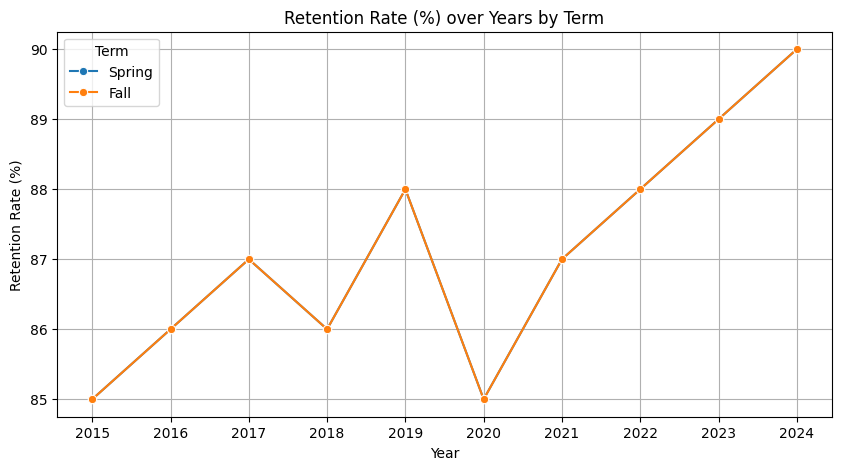

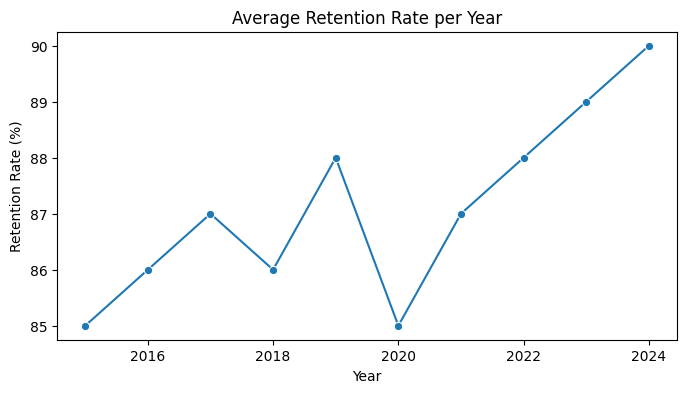

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Retention_rate', hue='Term', marker='o')
plt.title('Retention Rate (%) over Years by Term')
plt.ylabel('Retention Rate (%)')
plt.xticks(sorted(df['Year'].unique()))
plt.grid(True)
plt.show()

# Promedio por año (ambos términos juntos)
plt.figure(figsize=(8,4))
year_avg = df.groupby('Year')['Retention_rate'].mean().reset_index()
sns.lineplot(data=year_avg, x='Year', y='Retention_rate', marker='o')
plt.title('Average Retention Rate per Year')
plt.ylabel('Retention Rate (%)')
plt.show()

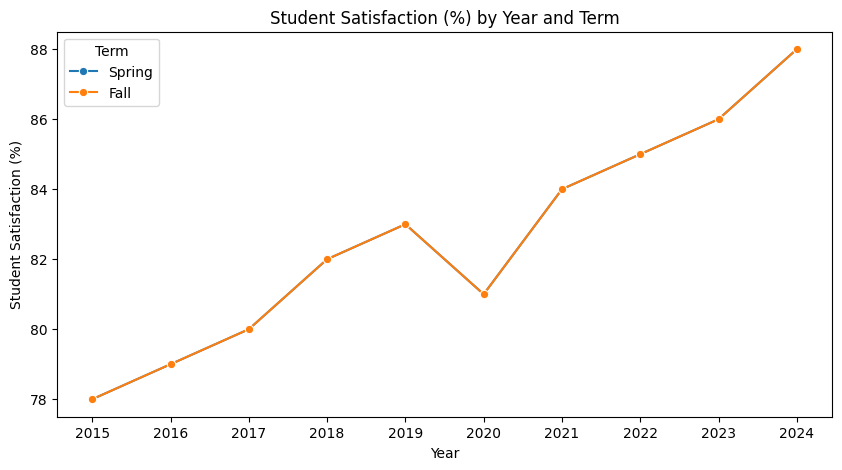

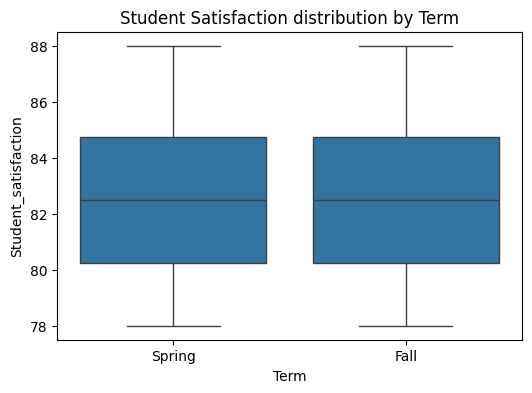

In [14]:
# === CELDA 8: Visualización 2 - Student satisfaction scores by year ===
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Student_satisfaction', hue='Term', marker='o')
plt.title('Student Satisfaction (%) by Year and Term')
plt.ylabel('Student Satisfaction (%)')
plt.xticks(sorted(df['Year'].unique()))
plt.show()

# Boxplot para ver distribución por término
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Term', y='Student_satisfaction')
plt.title('Student Satisfaction distribution by Term')
plt.show()


     Term  Retention_rate  Student_satisfaction
0    Fall            87.1                  82.6
1  Spring            87.1                  82.6


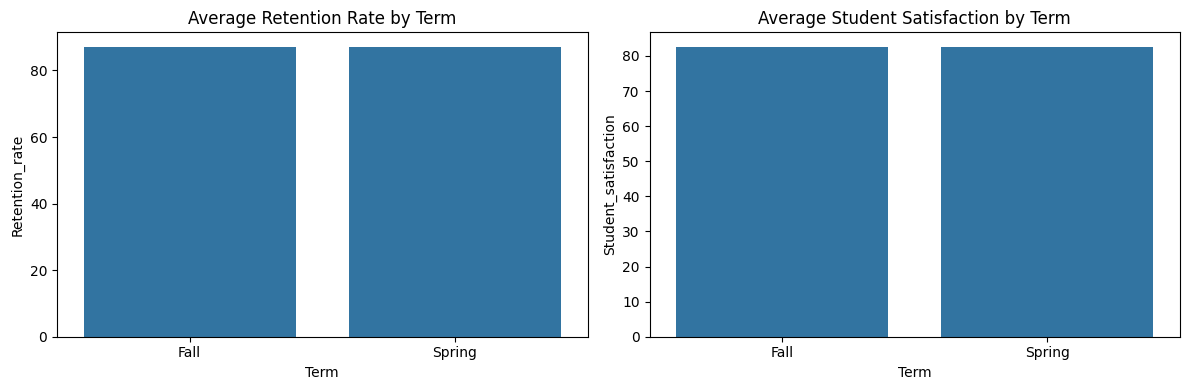

In [15]:
term_stats = df.groupby('Term')[['Retention_rate','Student_satisfaction']].mean().reset_index()
print(term_stats)

fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.barplot(data=term_stats, x='Term', y='Retention_rate', ax=axes[0])
axes[0].set_title('Average Retention Rate by Term')

sns.barplot(data=term_stats, x='Term', y='Student_satisfaction', ax=axes[1])
axes[1].set_title('Average Student Satisfaction by Term')
plt.tight_layout()
plt.show()


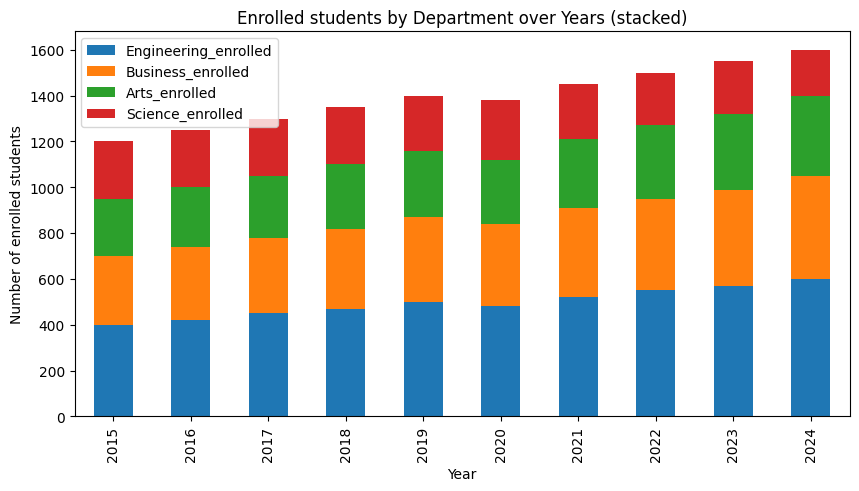

In [16]:
dept = df[['Year','Engineering_enrolled','Business_enrolled','Arts_enrolled','Science_enrolled']].groupby('Year').sum()
dept.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Enrolled students by Department over Years (stacked)')
plt.ylabel('Number of enrolled students')
plt.show()